In [30]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files
from sklearn.utils import shuffle

In [31]:
!pip install nltk

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, RegexpStemmer, WordNetLemmatizer
from textblob import TextBlob

In [33]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [35]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()

In [36]:
#Data_C is the combined data
Data_C = pd.concat([Data_1, Data_2, Data_3], ignore_index = True)

In [37]:
Data_C = shuffle(Data_C).reset_index(drop=True)

In [38]:
Data_C.shape

(113474, 3)

In [39]:
vectorizer_C = TfidfVectorizer()
TC = vectorizer_C.fit_transform(Data_C['Tweet_P'])
joblib.dump(vectorizer_C, 'tfidf_vectorizer_C.pkl')
LC = Data_C['Label']
TC_train, TC_test, LC_train, LC_test = train_test_split(TC, LC, test_size=0.2, random_state=42)
print(TC_train.shape, TC_test.shape, LC_train.shape, LC_test.shape)

(90779, 55411) (22695, 55411) (90779,) (22695,)


In [40]:
#Logistic Regression Model
model_C = LogisticRegression()
model_C.fit(TC_train, LC_train)

LogisticRegression()

In [41]:
joblib.dump(model_C, 'logistic_regression_model_C.pkl')

['logistic_regression_model_C.pkl']

In [42]:
LC_predicted = model_C.predict(TC_test)
print("Model trained on Combined Data & Tested on Same")
print("Accuracy Score 1: \n", accuracy_score(LC_test, LC_predicted))
print("Confusion Matrix: \n", confusion_matrix(LC_test, LC_predicted))
print("Classification Report: \n", classification_report(LC_test, LC_predicted))

Model trained on Combined Data & Tested on Same
Accuracy Score 1: 
 0.9487992949988985
Confusion Matrix: 
 [[12914   308]
 [  854  8619]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     13222
           1       0.97      0.91      0.94      9473

    accuracy                           0.95     22695
   macro avg       0.95      0.94      0.95     22695
weighted avg       0.95      0.95      0.95     22695



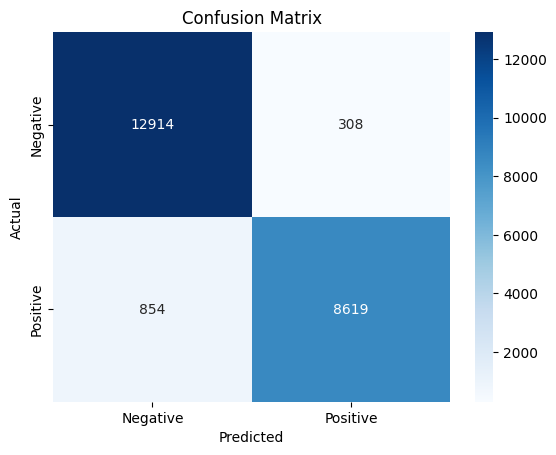

In [43]:
sns.heatmap(confusion_matrix(LC_test, LC_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()